<a href="https://colab.research.google.com/github/bmorbin/flights-delay/blob/main/C%C3%B3pia_de_D%26N_Teste_de_Conhecimentos_em_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python-Based Data Knowledge Test

In this test, you will have the opportunity to demonstrate your data handling skills using the Python programming language.

The test will consist of 3 stages of knowledge assessment in the areas of:

- *** Data Engineering (ETL, Queries, Automated Ingestion and Extraction) ***
- *** Data Visualization and Data Analysis ***
- *** Machine Learning Model Training ***

The purpose is to assess your overall knowledge in these areas, so there's no issue if you're unable to complete some of the modules. The key is to focus on your strongest skills. However, remember that the more comprehensive the result of your case is, the better your final outcome will be.

Delivery time will be evaluated, as deadlines are one of the most important aspects. Therefore, know how to prioritize what should be delivered based on your skill set. Again, do not worry if you are unable to complete all activities.

You should download this notebook and then host it on Google Colab with your saved results displayed. The code will be re-executed to validate if the provided code generates the shown result.

# Dataset Info

To carry out the above stages, we will use the "2015 Flight Delays and Cancellations" dataset from Kaggle, which contains public flight data from the major American airlines.

To download the dataset, download these 3 files:
- [airlines.csv](https://drive.google.com/file/d/1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT/view)
- [airports.csv](https://drive.google.com/file/d/11NKHy78lyYl6az1MMXIPX2LPht9ITLxA/view)
- [flights.csv](https://drive.google.com/file/d/1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR/view)

## About Dataset
### Context
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

### Acknowledgements
The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics.

# 1. Data Engineering (ETL, Queries, Automated Ingestion and Extraction)

## Instructions for the ETL Task

1. Import the data from the 'airlines.csv', 'airports.csv', and 'flights.csv' files into the corresponding tables in the SQLite database.
2. Use SQL commands to transform and combine this data as needed.
3. Identify the top 5 airports with the highest number of delays. Consider departure delays ('DEPARTURE_DELAY').
4. Create a new table 'top_airports_delay' and insert the results of the previous query into this table.
5. Show the result of table in table or dataframe format.

In [2]:
import sqlite3

# Create a connection to the SQLite database (created in memory for this example)
conn = sqlite3.connect(':memory:')

# Create a cursor to execute SQL commands
cursor = conn.cursor()

# Create tables for each of the CSV files
# Table for airlines.csv
cursor.execute('''
    CREATE TABLE airlines (
        IATA_CODE TEXT PRIMARY KEY,
        AIRLINE TEXT
    );
''')

# Table for airports.csv
cursor.execute('''
    CREATE TABLE airports (
        IATA_CODE TEXT PRIMARY KEY,
        AIRPORT TEXT,
        CITY TEXT,
        STATE TEXT,
        COUNTRY TEXT,
        LATITUDE REAL,
        LONGITUDE REAL
    );
''')

# Table for flights.csv
cursor.execute('''
    CREATE TABLE flights (
        YEAR INTEGER,
        MONTH INTEGER,
        DAY INTEGER,
        DAY_OF_WEEK INTEGER,
        AIRLINE TEXT,
        FLIGHT_NUMBER INTEGER,
        TAIL_NUMBER TEXT,
        ORIGIN_AIRPORT TEXT,
        DESTINATION_AIRPORT TEXT,
        SCHEDULED_DEPARTURE TEXT,
        DEPARTURE_TIME TEXT,
        DEPARTURE_DELAY REAL,
        TAXI_OUT REAL,
        WHEELS_OFF TEXT,
        SCHEDULED_TIME REAL,
        ELAPSED_TIME REAL,
        AIR_TIME REAL,
        DISTANCE INTEGER,
        WHEELS_ON TEXT,
        TAXI_IN REAL,
        SCHEDULED_ARRIVAL TEXT,
        ARRIVAL_TIME TEXT,
        ARRIVAL_DELAY REAL,
        DIVERTED INTEGER,
        CANCELLED INTEGER,
        CANCELLATION_REASON TEXT,
        AIR_SYSTEM_DELAY REAL,
        SECURITY_DELAY REAL,
        AIRLINE_DELAY REAL,
        LATE_AIRCRAFT_DELAY REAL,
        WEATHER_DELAY REAL
    );
''')


In [3]:
! pip install gdown==4.6.0 # Necessary to download large files from GoogleDrive
! gdown --version

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
gdown 4.6.0 at /usr/local/lib/python3.10/dist-packages


In [4]:
# Start your codes here

# Importing libraries
import pandas as pd
import gdown # version 4.6.0
import numpy as np

## Extract data by given URL

Fixing the `gdown` library in version 4.6.0, it was possible to download the files by given URL. (Source: https://github.com/wkentaro/gdown/issues/43).  

In [5]:
# Uncomment this block of code to dowload the files in local store for the first time
url_files = [
    ("https://drive.google.com/file/d/1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT/view", 'airlines.csv'),
    ("https://drive.google.com/file/d/11NKHy78lyYl6az1MMXIPX2LPht9ITLxA/view", 'airports.csv'),
    ("https://drive.google.com/file/d/1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR/view", 'flights.csv')
    ]

for url, output in url_files:
  gdown.download(url=url, output=output,
                 quiet=False, fuzzy=True, use_cookies=False)

Downloading...
From: https://drive.google.com/uc?id=1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT
To: /content/airlines.csv
100%|██████████| 359/359 [00:00<00:00, 1.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=11NKHy78lyYl6az1MMXIPX2LPht9ITLxA
To: /content/airports.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 39.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR
To: /content/flights.csv
100%|██████████| 592M/592M [00:11<00:00, 52.9MB/s]


In [6]:
rawdt_airlines = pd.read_csv('/content/airlines.csv')
rawdt_airports = pd.read_csv('/content/airports.csv')

---
## Airlines set

Dictionaray of features in the raw data (source in https://www.kaggle.com/datasets/usdot/flight-delays/data?select=airlines.csv):

*   `IATA_CODE`: Airline Identifier
*   `AIRLINE`: Airline's Name



In [7]:
rawdt_airlines.info()
display(rawdt_airlines.head())
print('Duplicated entries (just to verify):',sum(rawdt_airlines.duplicated()))

# Importing to SQL connection
rawdt_airlines.to_sql('airlines', conn, index=False, if_exists='replace')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Duplicated entries (just to verify): 0


14

---
## Airports set

Dictionaray of features in the raw data (source in https://www.kaggle.com/datasets/usdot/flight-delays/data?select=airports.csv):

*   `IATA_CODE`: Location Identifier
*   `AIRPORT`: Airport's Name
*   `CITY`
*   `STATE`
*   `COUNTRY`: Country Name of the Airport
*   `LATITUDE`: Latitude of the Airport
*   `LONGITUDE`: Longitude of the Airport



In [8]:
rawdt_airports.info()
display(rawdt_airports.head())
display(rawdt_airports.tail())
print('Duplicated entries (just to verify):',sum(rawdt_airports.duplicated()))

# Verify believable latitude and longitude
rawdt_airports[-(rawdt_airports.LATITUDE.between(-180,+180,inclusive='both') & rawdt_airports.LONGITUDE.between(-180,+180,inclusive='both'))]

# By making a search (in Wikipedia) it's possible to find the missing coordinates:
missing_coordinates = [('ECP',30.358333, -85.795556),
 ('PBG',44.650833, -73.468056),
 ('UST',29.95925, -81.339722)
]
rawdt_airports1 = rawdt_airports.copy()
for code, lat, lon in missing_coordinates:
  rawdt_airports1.loc[rawdt_airports['IATA_CODE']==code,['LATITUDE','LONGITUDE']] = [lat,lon]

# Importing to SQL connection
rawdt_airports1.to_sql('airports', conn, index=False, if_exists='replace')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


Duplicated entries (just to verify): 0


322

---
## Flights set

Dictionary of features (source: https://www.kaggle.com/datasets/usdot/flight-delays/data?select=flights.csv):

*   `YEAR`: Year of the Flight Trip
*   `MONTH`: Month of the Flight Trip
*   `DAY`: Day of the Flight Trip
*   `DAY_OF_WEEK`: Day of week of the Flight Trip
*   `AIRLINE`: Airline Identifier
*   `FLIGHT_NUMBER`: Flight Identifier
*   `TAIL_NUMBER`: Aircraft Identifier
*   `ORIGIN_AIRPORT`: Starting Airport
*   `DESTINATION_AIRPORT`: Destination Airport
*   `SCHEDULED_DEPARTURE`: **(HH:MM)** Planned Departure Time
*   `DEPARTURE_TIME`: **(HH:MM)** WHEEL_OFF - TAXI_OUT
*   `DEPARTURE_DELAY`: **(minutes)** Total Delay on Departure
*   `TAXI_OUT`: **(minutes)** The time duration elapsed between departure from the origin airport gate and wheels off
*   `WHEELS_OFF`: **(HH:MM)** The time point that the aircraft's wheels leave the ground
*   `SCHEDULED_TIME`: **(minutes)** Planned time amount needed for the flight trip
*   `ELAPSED_TIME`: **(minutes)** AIR_TIME+TAXI_IN+TAXI_OUT
*   `AIR_TIME`: **(minutes)** The time duration between wheels_off and wheels_on time
*   `DISTANCE`: Distance between two airports
*   `WHEELS_ON`: **(HH:MM)** The time point that the aircraft's wheels touch on the ground
*   `TAXI_IN`: **(minutes)** The time duration elapsed between wheels-on and gate arrival at the destination airport
*   `SCHEDULED_ARRIVAL`: **(HH:MM)** Planned arrival time
*   `ARRIVAL_TIME`: **(HH:MM)** WHEELS_ON+TAXI_IN
*   `ARRIVAL_DELAY`: **(minutes)** ARRIVAL_TIME-SCHEDULED_ARRIVAL
*   `DIVERTED`: Aircraft landed on airport that out of schedule
*   `CANCELLED`: Flight Cancelled (1 = cancelled)
*   `CANCELLATION_REASON`: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
*   `AIR_SYSTEM_DELAY`: **(minutes)** Delay caused by air system
*   `SECURITY_DELAY`: **(minutes)** Delay caused by security
*   `AIRLINE_DELAY`: **(minutes)** Delay caused by the airline
*   `LATE_AIRCRAFT_DELAY`: **(minutes)** Delay caused by aircraft
*   `WEATHER_DELAY`: **(minutes)** Delay caused by weather



By making a search in the original site of collected data, https://www.transtats.bts.gov/ONTIME/Departures.aspx, it was possible to identify some columns like a time (so in format of hour:minute of the day) and others like duration in minutes. To insure that, it's presented the first row of the data and it's necessary to transform some types of columns. So, actually, some columns are TEXT instead of REAL type.

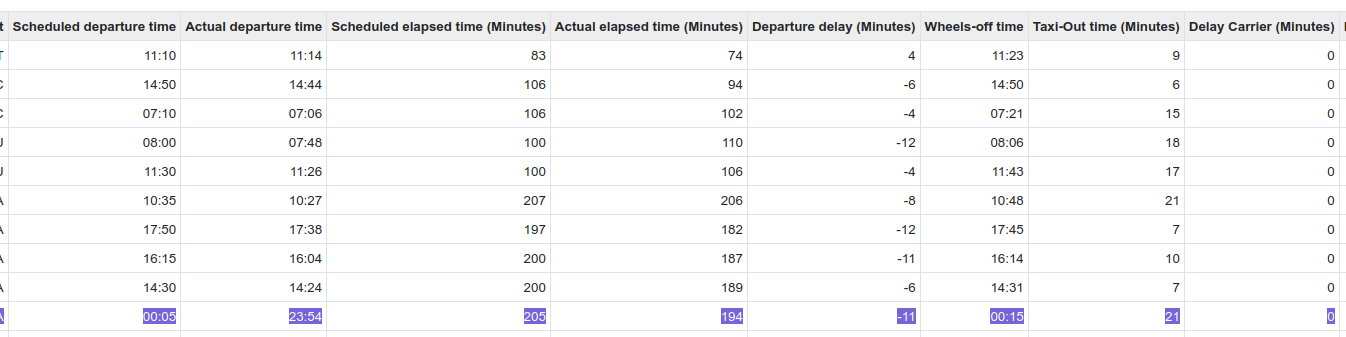

In [9]:
# Let read only the first row of the raw file (without converting data types)
pd.set_option('display.max_columns', None)
display(pd.read_csv('/content/flights.csv', dtype=str, nrows=1))

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rawdt_flights = pd.read_csv('/content/flights.csv', dtype={'SCHEDULED_DEPARTURE':str,'DEPARTURE_TIME':str,'WHEELS_OFF':str,'WHEELS_ON':str,'SCHEDULED_ARRIVAL':str,'ARRIVAL_TIME':str}) # if necessary, it can be loaded by chunks to optimize

<ipython-input-10-d6b543e32363>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  rawdt_flights = pd.read_csv('/content/flights.csv', dtype={'SCHEDULED_DEPARTURE':str,'DEPARTURE_TIME':str,'WHEELS_OFF':str,'WHEELS_ON':str,'SCHEDULED_ARRIVAL':str,'ARRIVAL_TIME':str}) # if necessary, it can be loaded by chunks to optimize


In [11]:
print('\nVariables and types:\n')
rawdt_flights.info()
print('\nDataset first 5 rows:\n')
display(rawdt_flights.head())
prev_description_flights = rawdt_flights.describe()
print('\nPrevious description for numeric columns:\n')
display(round(prev_description_flights.T,2))
print('\nMissing count in each column:\n')
display(rawdt_flights.isna().sum())

# Importing to SQL connection
rawdt_flights.to_sql('flights', conn, index=False, if_exists='replace')


Variables and types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  object 
 10  DEPARTURE_TIME       object 
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           object 
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            object 
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    object 
 21  ARRIVAL_TIME         object 
 22  ARRIVAL_DELAY        float64
 23  DIVERTED 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11.0,21.0,0015,205.0,194.0,169.0,1448,0404,4.0,0430,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8.0,12.0,0014,280.0,279.0,263.0,2330,0737,4.0,0750,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2.0,16.0,0034,286.0,293.0,266.0,2296,0800,11.0,0806,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5.0,15.0,0030,285.0,281.0,258.0,2342,0748,8.0,0805,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,0024,-1.0,11.0,0035,235.0,215.0,199.0,1448,0254,5.0,0320,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



Previous description for numeric columns:



,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.00,0.00,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.52,3.41,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.70,8.78,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.93,1.99,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.09,1757.06,1.0,730.0,1690.0,3230.0,9855.0
DEPARTURE_DELAY,5732926.0,9.37,37.08,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.07,8.90,1.0,11.0,14.0,19.0,225.0
SCHEDULED_TIME,5819073.0,141.69,75.21,18.0,85.0,123.0,173.0,718.0
ELAPSED_TIME,5714008.0,137.01,74.21,14.0,82.0,118.0,168.0,766.0
AIR_TIME,5714008.0,113.51,72.23,7.0,60.0,94.0,144.0,690.0



Missing count in each column:



YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

5819079

## Top 5 airports with the highest number of delays

Identify the top 5 airports with the highest number of delays. Consider departure delays ('DEPARTURE_DELAY').

In [12]:
# A function to print the results of a query into pandas dataframe (better to see in the notebook)
def query_result(query):
  result = conn.execute(query)
  return display(pd.DataFrame(result.fetchall(),columns=[description[0] for description in result.description]))

In [13]:
# Getting the top 5 airports with highest number of delays,
# considering delay with DEPARTURE_DELAY > 0
query_result('''
SELECT ORIGIN_AIRPORT, COUNT() COUNT
FROM flights
WHERE DEPARTURE_DELAY > 0
GROUP BY ORIGIN_AIRPORT
''')

,ORIGIN_AIRPORT,COUNT
0,10135,69
1,10136,39
2,10140,687
3,10141,16
4,10146,20
...,...,...
621,WRG,194
622,WYS,41
623,XNA,2783
624,YAK,128


Notice that there is more CODES in ORIGIN_CODE than in the table of IATA_CODE. With a long search, it was observed that these another codes is in US DOT format and in [this link](https://www.transtats.bts.gov/FieldInfo.asp?Svryq_Qr5p=b4vtv0%FDNv42146%FP%FDNv42146%FDVQ.%FDN0%FDvqr06vsvpn6v10%FD07zor4%FDn55vt0rq%FDoB%FDhf%FDQbg%FD61%FDvqr06vsB%FDn%FD70v37r%FDnv42146.%FD%FDh5r%FD6uv5%FDsvryq%FDs14%FDnv42146%FDn0nyB5v5%FDnp4155%FDn%FD4n0tr%FD1s%FDBrn45%FDorpn75r%FDn0%FDnv42146%FDpn0%FDpun0tr%FDv65%FDnv42146%FDp1qr%FDn0q%FDnv42146%FDp1qr5%FDpn0%FDor%FD4r75rq.&Svryq_gB2r=a7z&Y11x72_gnoyr=Y_NVecbeg_VQ&gnoyr_VQ=FGJ&flf_gnoyr_anzr=g_bagVZR_eRcbegVaT&fB5_Svryq_anzr=beVTVa_NVecbeg_VQ) is possible to access description for each one.

In [14]:
! wget --no-check-certificate 'https://www.transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVecbeg_VQ' -O usdotcode.csv

--2024-01-21 01:58:19--  https://www.transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVecbeg_VQ
Resolving www.transtats.bts.gov (www.transtats.bts.gov)... 204.68.194.70
Connecting to www.transtats.bts.gov (www.transtats.bts.gov)|204.68.194.70|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 321049 (314K) [Application/X-Unknown]
Saving to: ‘usdotcode.csv’

usdotcode.csv       100%[===================>] 313.52K   515KB/s    in 0.6s    

2024-01-21 01:58:20 (515 KB/s) - ‘usdotcode.csv’ saved [321049/321049]



In [15]:
dt_usdotcode = pd.read_csv('/content/usdotcode.csv', dtype=str)
dt_usdotcode.columns = ['USDOT_CODE','DESCRIPTION']
display(dt_usdotcode.loc[0:10,])

,USDOT_CODE,DESCRIPTION
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"
5,10007,"Klawock, AK: Klawock Seaplane Base"
6,10008,"Elizabeth Island, AK: Elizabeth Island Airport"
7,10009,"Homer, AK: Augustin Island"
8,10010,"Hudson, NY: Columbia County"
9,10011,"Peach Springs, AZ: Grand Canyon West"


In the site of the data, https://www.bts.gov/topics/airlines-and-airports/world-airport-codes, there is a code and a description which matches with the US DOT Code description.

In [16]:
refer_IATA_CODE = pd.read_html("https://www.bts.gov/topics/airlines-and-airports/world-airport-codes")[0]
refer_IATA_CODE.columns = ['IATA_CODE','DESCRIPTION']
print(refer_IATA_CODE.shape) # rows before drop duplicates
refer_IATA_CODE.drop_duplicates(subset='DESCRIPTION', keep='last', inplace=True) # removing duplicated descriptions (for consistency)
print(refer_IATA_CODE.shape) # rows after drop duplicates
# Actually only BSM Austin, TX: Austin - Bergstrom International need to be switch to AUS for this period (posterior analyses was made)
refer_IATA_CODE.loc[refer_IATA_CODE['IATA_CODE'] == 'BSM','IATA_CODE'] = 'AUS'

(6510, 2)
(6464, 2)


In [17]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS airports_USDOTCODE (
        CODE TEXT PRIMARY KEY,
        DESCRIPTION TEXT
    );
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS airports_IATACODE (
        CODE TEXT PRIMARY KEY,
        DESCRIPTION TEXT
    );
''')

refer_IATA_CODE.to_sql('airports_IATACODE', conn, index=False, if_exists='replace')
dt_usdotcode.to_sql('airports_USDOTCODE', conn, index=False, if_exists='replace')

6665

In [18]:
cursor.execute('DROP VIEW IF EXISTS IATA_USDOT')
cursor.execute('''
CREATE TEMPORARY VIEW IF NOT EXISTS IATA_USDOT AS
SELECT IATA_CODE, USDOT_CODE, a.DESCRIPTION DESCRIPTION
FROM airports_USDOTCODE a
INNER JOIN airports_IATACODE b ON a.DESCRIPTION = b.DESCRIPTION;
''')

query_result('''
SELECT * FROM IATA_USDOT
''')

,IATA_CODE,USDOT_CODE,DESCRIPTION
0,01A,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,10004,"Lik, AK: Lik Mining Camp"
3,05A,10005,"Little Squaw, AK: Little Squaw Airport"
4,06A,10006,"Kizhuyak, AK: Kizhuyak Bay"
...,...,...,...
6124,PSQ,16828,"Essington, PA: Philadelphia Seaplane Base"
6125,LNA,16829,"West Palm Beach, FL: Palm Beach County Park"
6126,2NY,16830,"Port Washington, NY: Sands Point Seaplane Base"
6127,IST,16858,"Istanbul, Turkey: Ataturk"


In [19]:
# Airports with non-matched IATA Code
cursor.execute('''
CREATE TEMPORARY VIEW IF NOT EXISTS UNMATCHED_USDOTCODE AS
SELECT USDOT_CODE, DESCRIPTION FROM
(
SELECT ORIGIN_AIRPORT
FROM
(SELECT DISTINCT(ORIGIN_AIRPORT) FROM flights WHERE LENGTH(ORIGIN_AIRPORT) > 3) a
LEFT JOIN IATA_USDOT b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
WHERE IATA_CODE IS NULL
) c
INNER JOIN airports_USDOTCODE d ON c.ORIGIN_AIRPORT = d.USDOT_CODE
''')

query_result('''
SELECT * FROM UNMATCHED_USDOTCODE
''')

# Making sure that the destination airports list don't have any other new airport unmatched
query_result('''
SELECT * FROM
(
SELECT USDOT_CODE FROM
(
SELECT DESTINATION_AIRPORT
FROM
(SELECT DISTINCT(DESTINATION_AIRPORT) FROM flights WHERE LENGTH(DESTINATION_AIRPORT) > 3) a
LEFT JOIN IATA_USDOT b ON a.DESTINATION_AIRPORT = b.USDOT_CODE
WHERE IATA_CODE IS NULL
) c INNER JOIN airports_USDOTCODE d ON c.DESTINATION_AIRPORT = d.USDOT_CODE
) e LEFT JOIN UNMATCHED_USDOTCODE f ON e.USDOT_CODE = f.USDOT_CODE
WHERE e.USDOT_CODE IS NULL
''')

,USDOT_CODE,DESCRIPTION
0,12889,"Las Vegas, NV: Harry Reid International"
1,15919,"Fayetteville, AR: Northwest Arkansas National"
2,14487,"Redding, CA: Redding Regional"
3,13256,"Mission/McAllen/Edinburg, TX: McAllen Internat..."
4,13796,"Oakland, CA: Metro Oakland International"
5,13296,"Manchester, NH: Manchester Boston Regional"
6,14307,"Providence, RI: Rhode Island Tf Green Internat..."
7,14576,"Rochester, NY: Frederick Douglass Grtr Rochest..."
8,13486,"Missoula, MT: Missoula Montana"
9,13367,"Moline, IL: Quad Cities International"


,USDOT_CODE,USDOT_CODE,DESCRIPTION


It can be possible to analyse each case of unmatched US DOT code with IATA code set. For example, Harry Reid International called McCarran International before, so the IATA code is LAS by making a search (Source: https://edition.cnn.com/travel/article/las-vegas-airport-name-change-vote-harry-reid/index.html)

In [20]:
# Manually input of IATA_CODE for those that unmatched US DOT before
# 'LAS','XNA','RDD','MFE','OAK','MHT','PVD','ROC','MSO','MLI','CRW','SDF','BMI','GCC','RKS','SUX','TOL','MLB','ROW','ROA','SWF','MQT'

res_unmatched_usdotcode = conn.execute('''
SELECT * FROM UNMATCHED_USDOTCODE
''')
tab_unmatched_usdotcode = pd.DataFrame(res_unmatched_usdotcode.fetchall(),columns=[description[0] for description in res_unmatched_usdotcode.description])

res_iata_usdot = conn.execute('''
SELECT * FROM IATA_USDOT
''')
tab_iata_usdot = pd.DataFrame(res_iata_usdot.fetchall(),columns=[description[0] for description in res_iata_usdot.description])

tab_unmatched_usdotcode['IATA_CODE'] = ['LAS','XNA','RDD','MFE','OAK','MHT','PVD','ROC','MSO','MLI','CRW','SDF','BMI','GCC','RKS','SUX','TOL','MLB','ROW','ROA','SWF','MQT']
new_tab_iata_usdot = pd.concat([tab_unmatched_usdotcode[['IATA_CODE','USDOT_CODE','DESCRIPTION']],tab_iata_usdot])

In [21]:
# Creating a table with IATA and USDOT codes matched
cursor.execute('''
    CREATE TABLE IF NOT EXISTS IATA_USDOT_CODE (
        IATA_CODE TEXT PRIMARY KEY,
        USDOT_CODE TEXT,
        DESCRIPTION TEXT
    );
''')

new_tab_iata_usdot.to_sql('IATA_USDOT_CODE', conn, index=False, if_exists='replace')

6151

In [22]:
# Query to look at airports without details in aiports table.
query_result('''
SELECT * FROM
(
SELECT DISTINCT(ORIGIN_IATA_AIRPORT) FROM
(
SELECT
  CASE
    WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
    ELSE IATA_CODE
  END ORIGIN_IATA_AIRPORT
FROM
flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
)
) a LEFT JOIN airports b ON a.ORIGIN_IATA_AIRPORT = b.IATA_CODE
WHERE IATA_CODE IS NULL
''')

,ORIGIN_IATA_AIRPORT,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE


In [23]:
# Finally, getting the top 5 airports with highest number of delays,
# considering delay with DEPARTURE_DELAY > 0
query_result('''
SELECT RANK() OVER(ORDER BY COUNT DESC) || 'º' RANK, AIRPORT, ORIGIN_AIRPORT_IATA IATA, COUNT COUNT_DELAYS
FROM
(
SELECT ORIGIN_AIRPORT_IATA, COUNT() COUNT
FROM
(
  SELECT
    DEPARTURE_DELAY,
    CASE
      WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
      ELSE IATA_CODE
    END ORIGIN_AIRPORT_IATA
  FROM
  flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
)
WHERE DEPARTURE_DELAY > 0
GROUP BY ORIGIN_AIRPORT_IATA
ORDER BY COUNT DESC
LIMIT 5
) a
INNER JOIN
airports b ON a.ORIGIN_AIRPORT_IATA = b.IATA_CODE
''')

,RANK,AIRPORT,IATA,COUNT_DELAYS
0,1º,Hartsfield-Jackson Atlanta International Airport,ATL,139519
1,2º,Chicago O'Hare International Airport,ORD,130240
2,3º,Dallas/Fort Worth International Airport,DFW,102583
3,4º,Denver International Airport,DEN,95870
4,5º,Los Angeles International Airport,LAX,87717


But if, according to https://en.wikipedia.org/wiki/Flight_cancellation_and_delay, we consider _"a flight to be delayed when it is 15 minutes later than its scheduled time"_ then the result is:

In [24]:
query_top5delays = '''
SELECT RANK() OVER(ORDER BY COUNT DESC) || 'º' RANK, AIRPORT, ORIGIN_AIRPORT_IATA IATA, COUNT COUNT_DELAYS
FROM
(
SELECT ORIGIN_AIRPORT_IATA, COUNT() COUNT
FROM
(
  SELECT
    *,
    CASE
      WHEN IATA_CODE IS NULL THEN ORIGIN_AIRPORT
      ELSE IATA_CODE
    END ORIGIN_AIRPORT_IATA
  FROM
  flights a LEFT JOIN IATA_USDOT_CODE b ON a.ORIGIN_AIRPORT = b.USDOT_CODE
)
WHERE DEPARTURE_DELAY > 15
GROUP BY ORIGIN_AIRPORT_IATA
ORDER BY COUNT DESC
LIMIT 5
) a
INNER JOIN
airports b ON a.ORIGIN_AIRPORT_IATA = b.IATA_CODE
'''

result_top5delays = conn.execute(query_top5delays)
top_airports_delay = pd.DataFrame(result_top5delays.fetchall(),columns=[description[0] for description in result_top5delays.description])
display(top_airports_delay)

,RANK,AIRPORT,IATA,COUNT_DELAYS
0,1º,Chicago O'Hare International Airport,ORD,69138
1,2º,Hartsfield-Jackson Atlanta International Airport,ATL,62696
2,3º,Dallas/Fort Worth International Airport,DFW,52629
3,4º,Denver International Airport,DEN,45256
4,5º,Los Angeles International Airport,LAX,41480


# 2. Data Visualization and Data Analysis

## Instructions for the Data Visualization Module
### Distribution of Delays by Airline:
- Create a chart showing the distribution of delays (both positive and negative) for each airline.
- The chart should allow for easy comparison between the companies.

### Relationship Between Flight Distance and Delays:
- Create a scatter plot that relates flight distance to departure delay.
- Identify any visible trends or patterns.

### Delays by Airline:
- Visualize how delays vary throughout the day.
- Consider showing the average delays by hour of departure.

### Map of Delays by Airport:
- Create a map visualization showing the location of airports with the quantity or percentage of delays.
- This may involve integrating geographical data of airports with flight delays.

### Temporal Analysis of Delays:
- Analyze how flight delays varied throughout the year 2015.
- Create a line or bar chart showing the monthly variation of delays.

### Additional Considerations:
- You could use libs like Matplotlib, Seaborn, Plotly, or any other visualization tool that you are comfortable with.
- Include legends, titles, axis labels, and any other annotations to make the visualizations easily interpretable.
- Provide a brief description or interpretation of the insights gained from each graph.

In [25]:
! pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.6 MB/s eta 0:00:00


In [26]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [27]:
def get_query_result(query, verbose=True):
  result = conn.execute(query)
  df_result = pd.DataFrame(result.fetchall(),columns=[description[0] for description in result.description])
  if verbose:
    print(query)
    display(df_result)
  return df_result

---
## Distribution of Delays by Airline

In [28]:
tab_delays_airline = get_query_result('''
SELECT DEPARTURE_DELAY, ARRIVAL_DELAY, '(' || a.AIRLINE || ') ' || b.AIRLINE  AIRLINE
FROM flights a LEFT JOIN airlines b ON a.AIRLINE = b.IATA_CODE
''')

tab_delays_airline = tab_delays_airline.astype({'DEPARTURE_DELAY':'float16','ARRIVAL_DELAY':'float16'})
tab_delays_airline.info()



SELECT DEPARTURE_DELAY, ARRIVAL_DELAY, '(' || a.AIRLINE || ') ' || b.AIRLINE  AIRLINE
FROM flights a LEFT JOIN airlines b ON a.AIRLINE = b.IATA_CODE



,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE
0,-11.0,-22.0,(AS) Alaska Airlines Inc.
1,-8.0,-9.0,(AA) American Airlines Inc.
2,-2.0,5.0,(US) US Airways Inc.
3,-5.0,-9.0,(AA) American Airlines Inc.
4,-1.0,-21.0,(AS) Alaska Airlines Inc.
...,...,...,...
5819074,-4.0,-26.0,(B6) JetBlue Airways
5819075,-4.0,-16.0,(B6) JetBlue Airways
5819076,-9.0,-8.0,(B6) JetBlue Airways
5819077,-6.0,-10.0,(B6) JetBlue Airways


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   DEPARTURE_DELAY  float16
 1   ARRIVAL_DELAY    float16
 2   AIRLINE          object 
dtypes: float16(2), object(1)
memory usage: 66.6+ MB


In [29]:
# Dash to plot chart
app = Dash(__name__)

app.layout = html.Div([
  # html.H2("Distribution of Delays by Airline"),
  html.P("Select delay type:"),
  dcc.RadioItems(
    id='is_arrival',
    options=['Departure delay', 'Arrival delay'],
    value='Departure delay', inline=True
  ),
  dcc.RadioItems(
    id='delay',
    options=['Positive', 'Negative', 'Both'],
    value='Both', inline=True
  ),
  dcc.Graph(id="graph"),
],style={'font-family':'sans-serif','background-color':'white','padding':'10px'})

@app.callback(
  Output("graph", "figure"),
  Input("delay", "value"),
  Input("is_arrival", "value"))
def display_graph(delay, is_arrival):
  if is_arrival=='Departure delay':
    if delay=='Both': tab = tab_delays_airline
    elif delay=='Positive': tab = tab_delays_airline.query('DEPARTURE_DELAY > 0')
    else: tab = tab_delays_airline.query('DEPARTURE_DELAY < 0')
    fig = px.histogram(tab, x="DEPARTURE_DELAY", color="AIRLINE",opacity=0.75, barmode='overlay',histnorm='percent', color_discrete_sequence=px.colors.qualitative.Dark24[:14])
  else:
    if delay=='Both': tab = tab_delays_airline
    elif delay=='Positive': tab = tab_delays_airline.query('ARRIVAL_DELAY > 0')
    else: tab = tab_delays_airline.query('ARRIVAL_DELAY < 0')
    fig = px.histogram(tab, x="ARRIVAL_DELAY", color="AIRLINE",opacity=0.75, barmode='overlay',histnorm='percent', color_discrete_sequence=px.colors.qualitative.Dark24[:14])
  return fig

app.run_server(debug=True, port='1', use_reloader=False)


<IPython.core.display.Javascript object>

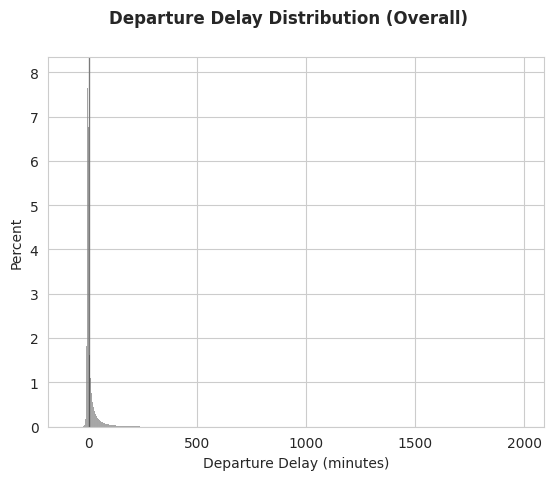

In [30]:
# Departure delay distribution in percent
sns.set_style("whitegrid")
p = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAY']),
                  x="DEPARTURE_DELAY",
                  stat='percent', binwidth=1, color='grey')
p.axvline(x=0, color='black', alpha=0.4, linewidth=1)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Percent")
plt.suptitle('Departure Delay Distribution (Overall)', fontweight='bold')
plt.show()

In [31]:
# Notice that 99.5% of the values in DEPARTURE_DELAY are between the next range presented:
DEPARTURE_DELAY_995p = tab_delays_airline.DEPARTURE_DELAY.quantile(q=[0.0025,0.9975]).to_list()
print(DEPARTURE_DELAY_995p)

print('Number of truncated informations: ',int(len(tab_delays_airline)*0.005))

# So let's truncate the values and set all under and above the range
tab_delays_airline['DEPARTURE_DELAYtrunc'] = tab_delays_airline.DEPARTURE_DELAY.copy()
tab_delays_airline.DEPARTURE_DELAYtrunc[tab_delays_airline.DEPARTURE_DELAYtrunc>DEPARTURE_DELAY_995p[1]] = DEPARTURE_DELAY_995p[1]+1
tab_delays_airline.DEPARTURE_DELAYtrunc[tab_delays_airline.DEPARTURE_DELAYtrunc<DEPARTURE_DELAY_995p[0]] = DEPARTURE_DELAY_995p[0]-1

[-16.0, 278.0]
Number of truncated informations:  29095


<ipython-input-31-d64fd9595803>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-d64fd9595803>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



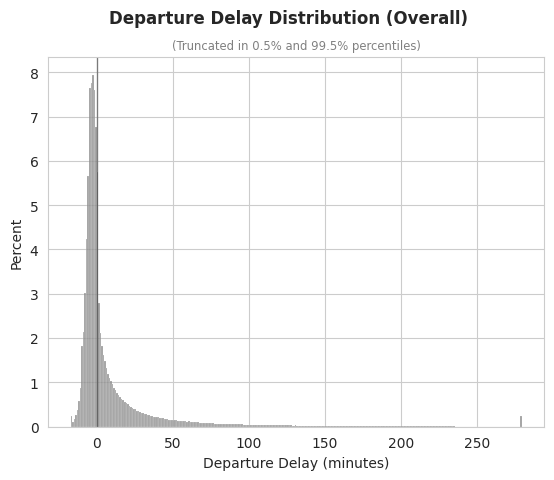

In [32]:
# Departure delay distribution in percent (truncated in 0.005 and 0.995 percentiles)
p = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']),
                  x="DEPARTURE_DELAYtrunc",
                  stat='percent', binwidth=1, color='grey')
p.axvline(x=0, color='black', alpha=0.4, linewidth=1)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Percent")
plt.suptitle('Departure Delay Distribution (Overall)', fontweight='bold')
plt.title('(Truncated in 0.5% and 99.5% percentiles)', color='grey', fontsize='small')
plt.show()

In [71]:
airlines_name = tab_delays_airline.AIRLINE.unique().tolist()
airlines_color = sns.color_palette('husl',len(airlines_name))

In [78]:
def draw_cdf_2airlines(airline, other_airline, axe, i, j, show_legend=False):
  sns.histplot(
    data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                  .query(f'AIRLINE == "{other_airline}"'), x="DEPARTURE_DELAYtrunc",
    element="step", fill=True,
    cumulative=True, stat="percent", color=airlines_color[j], linewidth=0.8, ax=axe,
    label=other_airline, legend=show_legend
  )

  sns.histplot(
    data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                  .query(f'AIRLINE == "{airline}"'), x="DEPARTURE_DELAYtrunc",
    element="step", fill=True,
    cumulative=True, stat="percent", color=airlines_color[i], alpha=0.5, ax=axe,
    label=airline, legend=show_legend
  )
  axe.axvline(x=0, color='black', alpha=0.4, linewidth=1)
  axe.set_xlabel("Departure Delay (minutes)", fontsize='small')
  axe.set_ylabel("Percent", fontsize='small')


def plot_dist_airline(airline):
  i = airlines_name.index(airline)
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,4))

  sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                    .query(f'AIRLINE == "{airline}"'),
                    x="DEPARTURE_DELAYtrunc",
                    stat='percent', binwidth=1, color=airlines_color[i], ax=ax1)
  ax1.axvline(x=0, color='black', alpha=0.4, linewidth=1)
  ax1.set_xlabel("Departure Delay (minutes)")
  ax1.set_ylabel("Percent")
  ax1.set_title('Departure Delay Distribution', color='grey',  fontsize='small')

  sns.histplot(
      data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']), x="DEPARTURE_DELAYtrunc",
      element="step", fill=True,
      cumulative=True, stat="percent", color='black', linewidth=0.8, ax=ax2
  )

  sns.histplot(
      data=tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc'])\
                    .query(f'AIRLINE == "{airline}"'), x="DEPARTURE_DELAYtrunc",
      element="step", fill=True,
      cumulative=True, stat="percent", color=airlines_color[i], alpha=0.5, ax=ax2
  )

  ax2.axvline(x=0, color='black', alpha=0.4, linewidth=1, label='Overall')
  ax2.set_xlabel("Departure Delay (minutes)")
  ax2.set_ylabel("Percent")
  ax2.set_title('Departure Delay Cumulative Distribution', color='grey',  fontsize='small')
  ax2.legend(loc='lower right')

  plt.suptitle(f'{airline}', color=airlines_color[i], fontweight='bold')

  plt.show()

def plot_compare_airlines_dist(airline,other_airline):
  i = airlines_name.index(airline)
  j = airlines_name.index(other_airline)
  fig, axarr = plt.subplots(1,2, figsize=(9,4), sharey=True)

  axe_neg = axarr[0]
  axe_pos = axarr[1]

  draw_cdf_2airlines(airline, other_airline, axe_neg, i, j)
  draw_cdf_2airlines(airline, other_airline, axe_pos, i, j, show_legend='full')

  axe_neg.set_title(f'Cumulative Distribution {airline} VS. {other_airline}', color='black',  fontsize='large', fontweight='bold', loc='left')
  axe_neg.set_xlim(right=0)
  axe_pos.set_xlim(left=0)
  axe_pos.legend()
  axe_pos.legend(loc='lower right')

  fig.tight_layout()
  fig.show()
  print("\n\n")

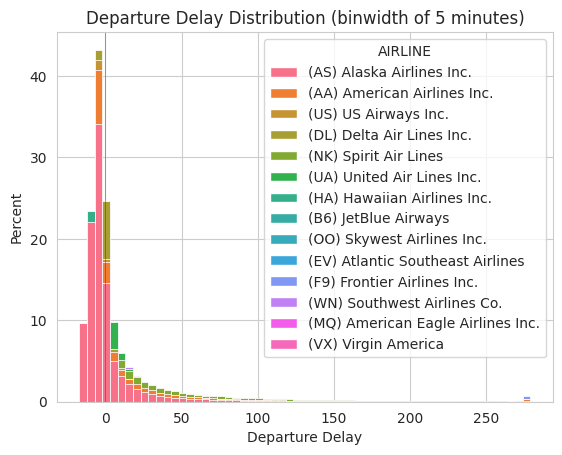

In [88]:
sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']), x="DEPARTURE_DELAYtrunc", hue="AIRLINE", stat="percent",
             binwidth=5, common_norm=False, alpha=1).set(title='Departure Delay Distribution (binwidth of 5 minutes)', xlabel='Departure Delay', ylabel='Percent')
plt.axvline(x=0, color='black', alpha=0.4, linewidth=0.5)
plt.show()

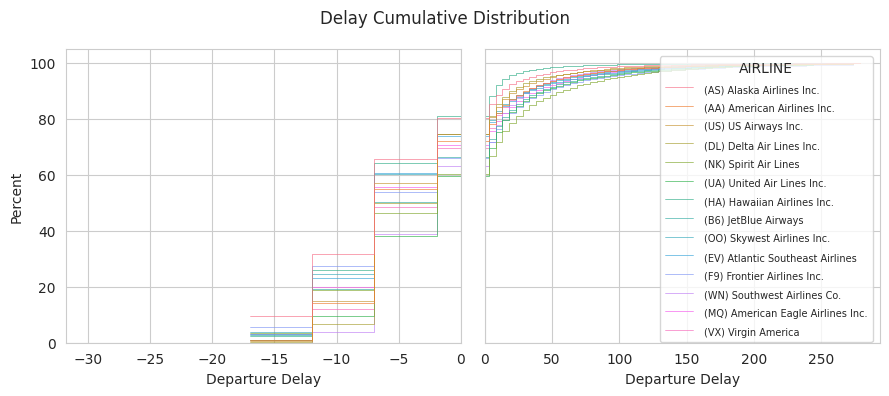

In [90]:
fig, (axe_neg, axe_pos) = plt.subplots(1,2, figsize=(9,4), sharey=True)

p1 = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']),
             x="DEPARTURE_DELAYtrunc",
             hue="AIRLINE",
             stat="percent",
             common_norm=False,
             element="step",
             fill=False,
             cumulative=True,
             alpha=0.9,
             ax=axe_neg,
             linewidth=0.5,
             legend=False,
             binwidth=5
             ).set(xlabel='Departure Delay', ylabel='Percent')

p2 = sns.histplot(tab_delays_airline.dropna(subset=['DEPARTURE_DELAYtrunc']),
             x="DEPARTURE_DELAYtrunc",
             hue="AIRLINE",
             stat="percent",
             common_norm=False,
             element="step",
             fill=False,
             cumulative=True,
             alpha=0.9,
             ax=axe_pos,
             linewidth=0.5,
             binwidth=5
             )

plt.setp(p2.get_legend().get_texts(), fontsize='7')
p2.set(xlabel='Departure Delay', ylabel='Percent')

plt.suptitle(f'Delay Cumulative Distribution')
axe_neg.set_xlim(right=0)
axe_pos.set_xlim(left=0)

plt.rcParams["font.size"] = "10"
fig.tight_layout()
fig.show()

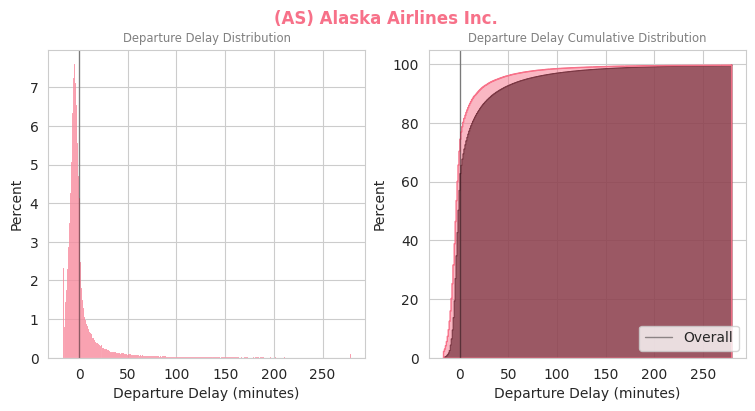

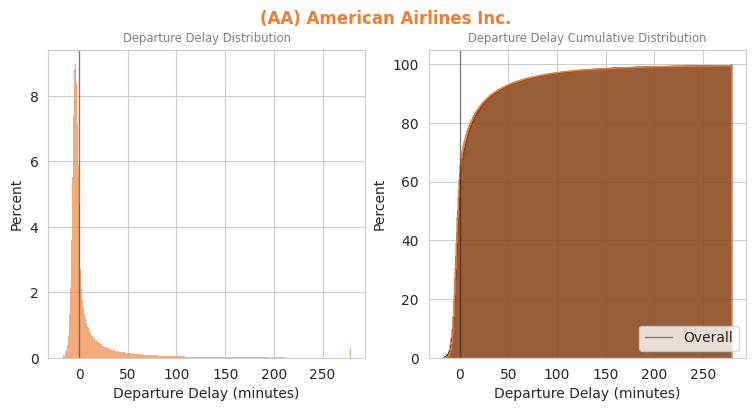

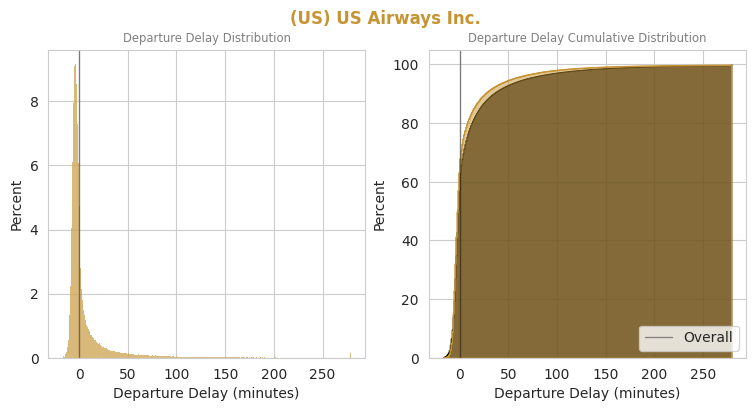

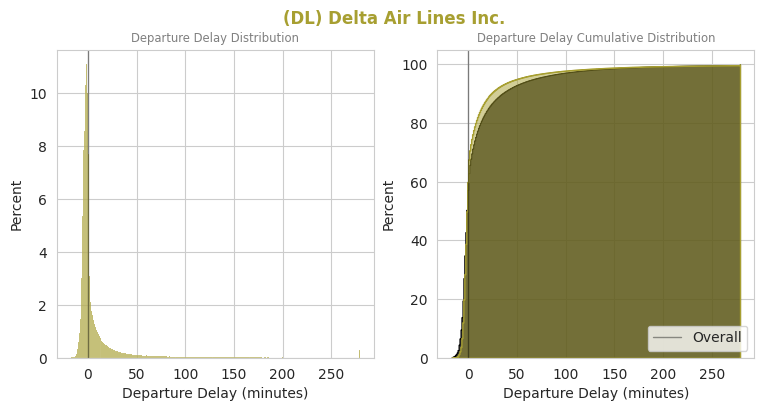

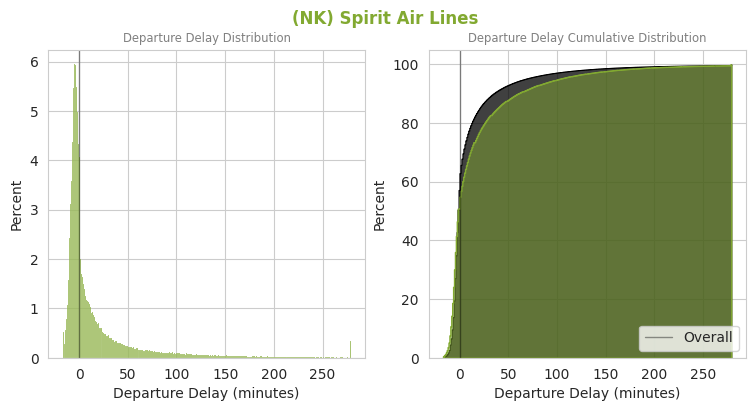

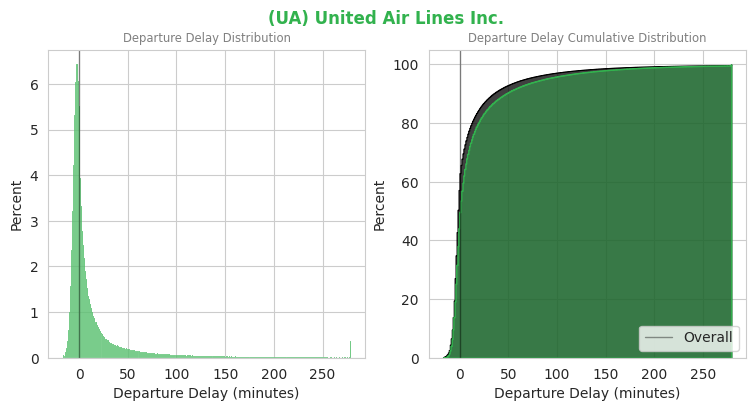

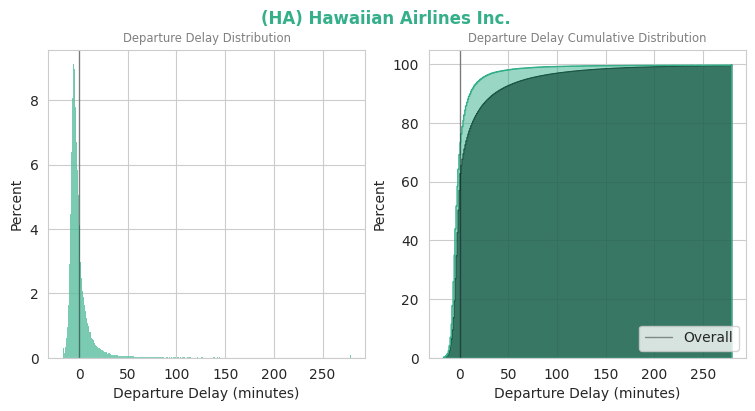

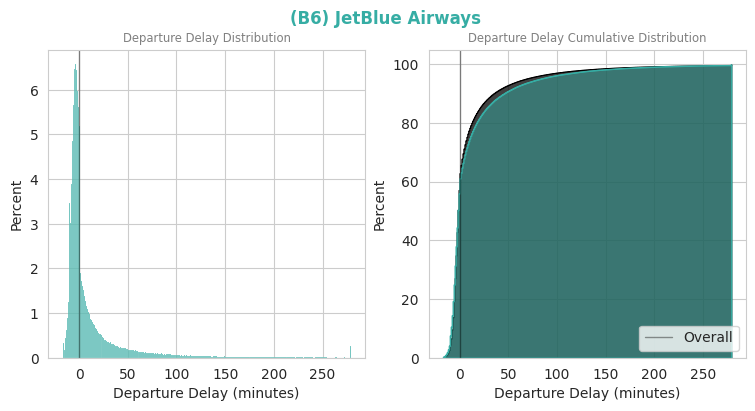

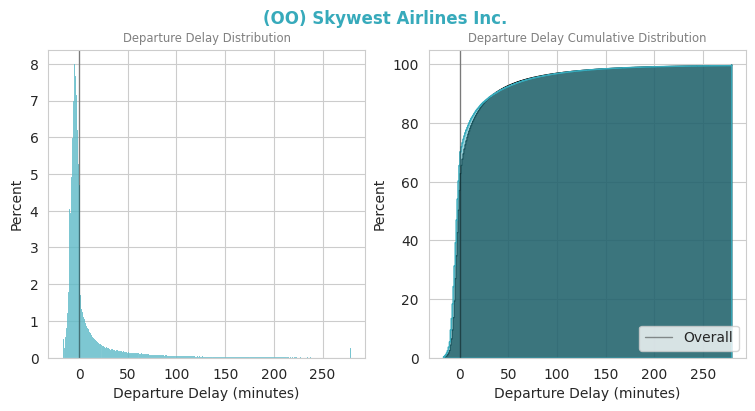

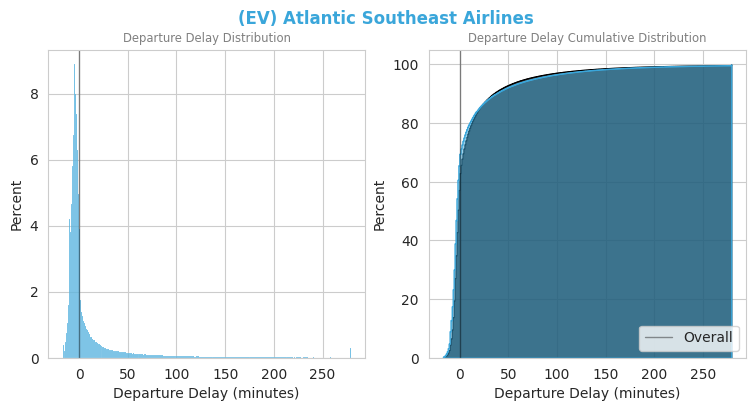

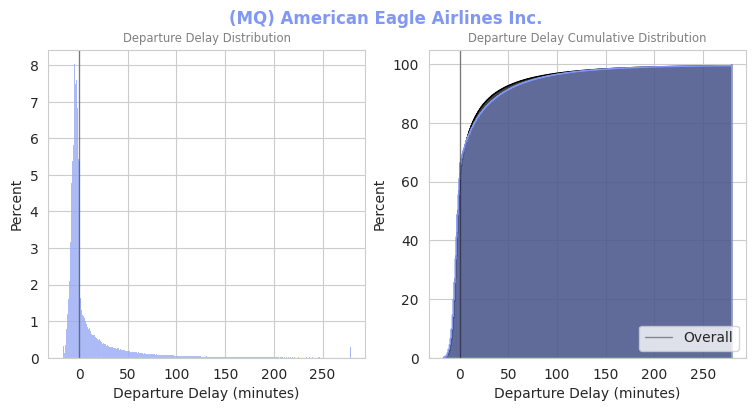

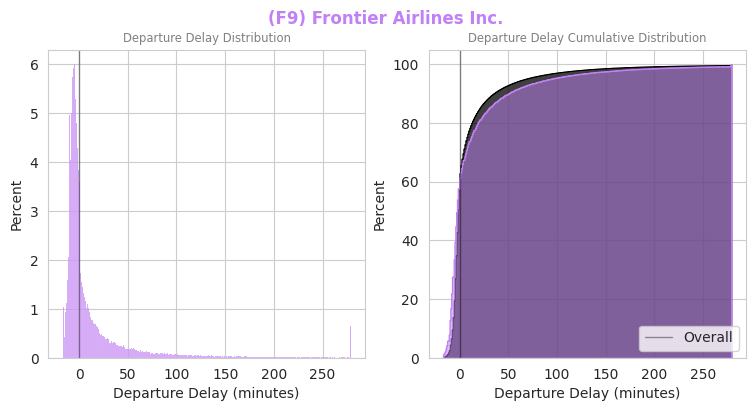

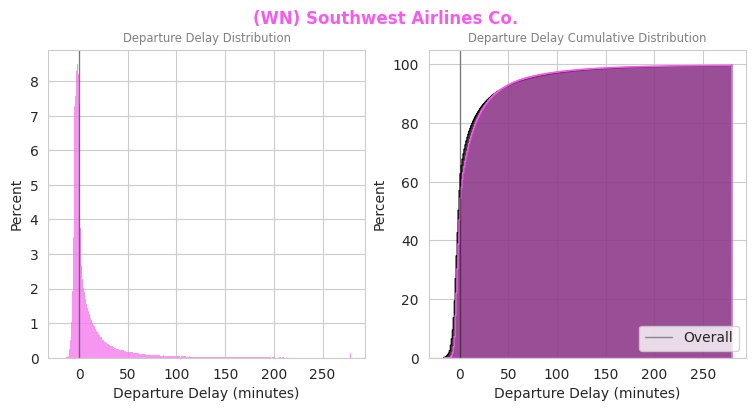

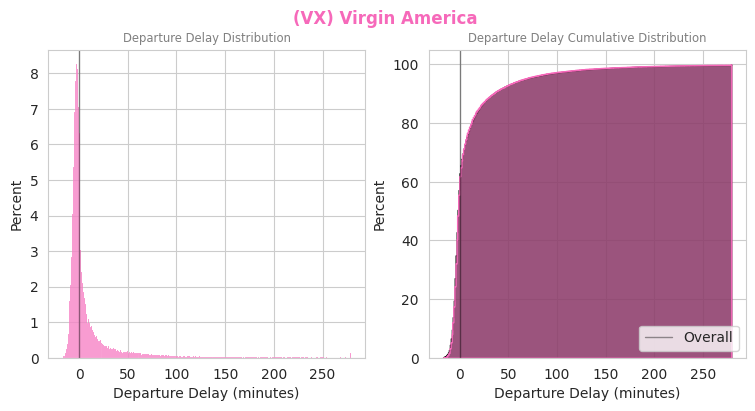

In [64]:
for airline in airlines_name:
  plot_dist_airline(airline)

Looking at the charts, it's possible to see that the curve of cumulative distribution (cdf) of (NK) Spirit Air Lines is under the overall curve so there are more flights with long minutes of departure delay. In other hand, (HA) Hawaiian Airlines Inc. seems be more "pontual" and have more or less 75% of the flights with no delay positive.

It's interesting observed that (AS) Alaska Airlines Inc. has a lot of flights with relative huge negative delay.

Let's compare above the NK and HA airlines' delay distribution:

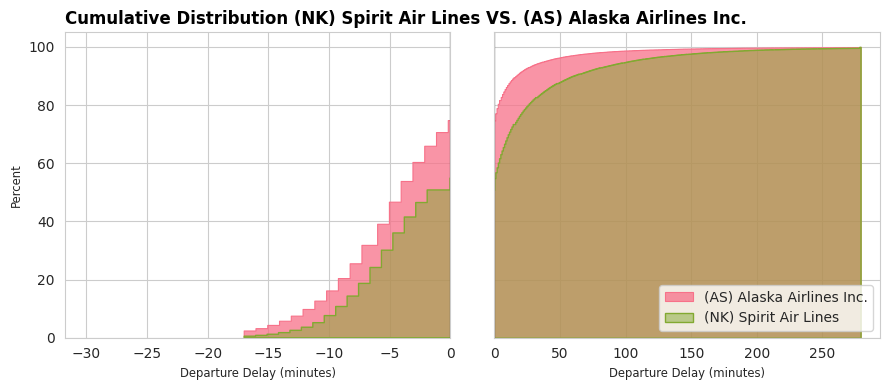

In [79]:
plot_compare_airlines_dist('(NK) Spirit Air Lines','(AS) Alaska Airlines Inc.')

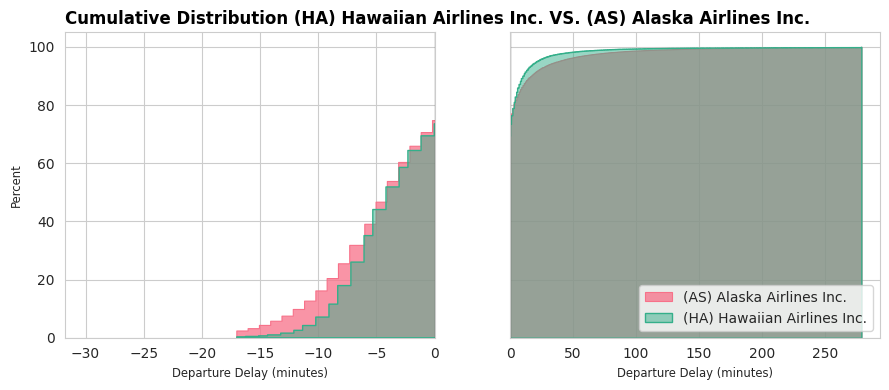

In [83]:
plot_compare_airlines_dist('(HA) Hawaiian Airlines Inc.','(AS) Alaska Airlines Inc.')

In the chart above, it's possible to observe that HA arlines have more flights "punctual" than Alask Airline which has more flights ahead.

---
## Relationship Between Flight Distance and Delays

    Create a scatter plot that relates flight distance to departure delay.
    Identify any visible trends or patterns.


In [84]:
tab_delays_distance = get_query_result('''
SELECT DISTANCE, DEPARTURE_DELAY
FROM flights
WHERE DISTANCE NOT NULL AND DEPARTURE_DELAY NOT NULL
''',
verbose=False)

tab_delays_distance = tab_delays_distance.astype({'DEPARTURE_DELAY':'float16'})

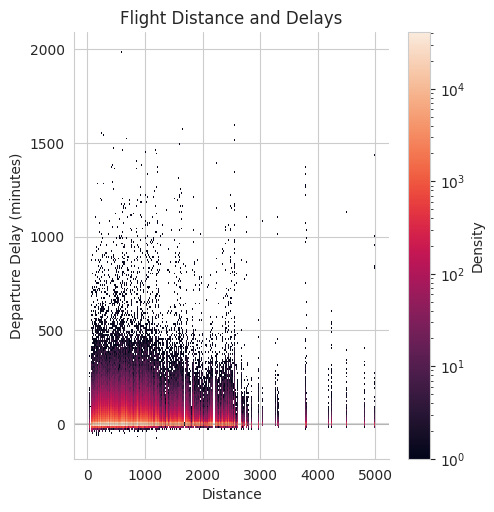

In [85]:
p = sns.displot(tab_delays_distance, x="DISTANCE", y="DEPARTURE_DELAY",
            binwidth=(10, 10), cbar=True, cmap="rocket", norm=LogNorm(), vmin=None, vmax=None, cbar_kws={'label': 'Density'})
p.set_axis_labels("Distance", "Departure Delay (minutes)")
p.set(title="Flight Distance and Delays")
p.ax.axhline(y = 0.2, color = "grey", alpha=0.3)

For the first view, it seems that the greater is distance, the departure delay don't changes the distribution a lot. However, identifying that for small distances (between the values 0 and 1500 in x-axis), there are a significant density for greater departure delay in fact.

---
## Delays by Throughout the Day

    Visualize how delays vary throughout the day.
    Consider showing the average delays by hour of departure.


In [104]:
tab_delay_per_hour = get_query_result('''
SELECT DEPARTURE_DELAY, SCHEDULED_DEPARTURE FROM flights WHERE DEPARTURE_DELAY NOT NULL
''', verbose=False)

tab_delay_per_hour = tab_delay_per_hour.astype({'DEPARTURE_DELAY':'float16'})

tab_delay_per_hour['HOUR_DAY'] = tab_delay_per_hour.SCHEDULED_DEPARTURE.str.slice(stop=2)
tab_delay_per_hour = tab_delay_per_hour.astype({'HOUR_DAY':'int8'})

# Visualize table to chart
tab_delay_per_hour.sample(10)

,DEPARTURE_DELAY,SCHEDULED_DEPARTURE,HOUR_DAY
5282760,-2.0,1105,11
4472151,-5.0,0740,7
1132416,27.0,1945,19
5700009,0.0,1750,17
3202129,-16.0,1409,14
4865488,0.0,0855,8
172579,19.0,1320,13
2101563,-4.0,1100,11
178007,2.0,1857,18
2469774,230.0,0934,9


[Text(0.5, 1.0, 'Delay per Hour of the Day'),
 Text(0.5, 0, 'Day Hour'),
 Text(0, 0.5, 'Departure Delay Average (minutes)')]

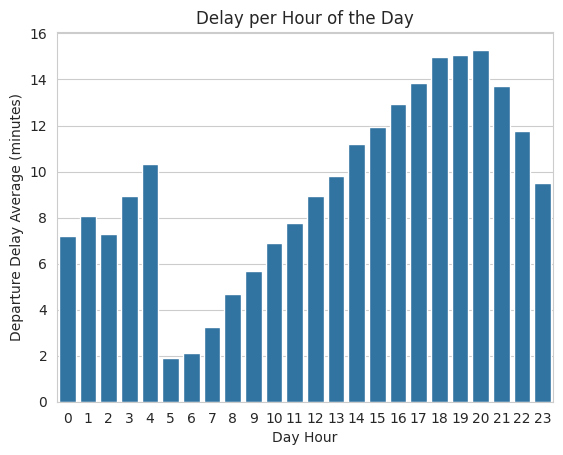

In [131]:
res = tab_delay_per_hour.groupby(by=["HOUR_DAY"]).mean('DEPARTURE_DELAY')
sns.barplot(x=res.index, y=res.DEPARTURE_DELAY).set(title='Delay per Hour of the Day',  xlabel='Day Hour', ylabel='Departure Delay Average (minutes)')


---
## Map of Delays by Airport

    Create a map visualization showing the location of airports with the quantity or percentage of delays.
    This may involve integrating geographical data of airports with flight delays.


---
## Temporal Analysis of Delays

    Analyze how flight delays varied throughout the year 2015.
    Create a line or bar chart showing the monthly variation of delays.


# 3. Machine Learning Model Training

## Instructions for the Machine Learning Model Training Module

### Model Objective:
- Develop a Machine Learning model to predict flight delays. The target could be a binary variable indicating whether a flight will be delayed by more than 15 minutes, for example.

### Data Preprocessing:
- Perform data cleaning and preparation. This should include handling missing values, encoding categorical variables, normalizing or standardizing numerical variables, and possibly creating new features (feature engineering).

- Justify the preprocessing choices.

### Data Split:
- Divide the data into training and test sets.

### Model Selection and Training:
- Choose an appropriate model (e.g., logistic regression, decision trees, random forest, etc.).
- Train the model and optimize hyperparameters.

### Model Evaluation:
- Evaluate the model using appropriate metrics such as accuracy, recall, F1-score, AUC-ROC, etc.
- Provide an interpretation of the results and metrics.

### Insights and Improvements:
- Discuss possible insights gained from the model and suggestions for future improvements.

### Additional Considerations:
- You could use libraries like scikit-learn, XGboost, TensorFlow, or PyTorch, depending on the desired complexity level.
- Document each step, including the model choice and justification, as well as the interpretation of results.
- Consider asking for further exploration, like variable importance analysis or model error diagnostics.

In [ ]:
# Start your codes here

